<a href="https://colab.research.google.com/github/Pemi-adekanmi/Aella-Loan-Default-Prediction/blob/main/Aella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the Standard Libraries

In [1]:
!pip install -q xgboost==0.4a30

     |████████████████████████████████| 757kB 4.0MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Importing the Data

In [3]:
data = pd.read_csv('Default_Fin.csv')

In [4]:
data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [6]:
data.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

## Analysis on Defaulted Customers

Data irregularities is a norm in real-world data as they are usually dirty and messy and will require thorough cleaning and transformation. Surprisingly, this dataset has no anomalies or irregularities. Nonetheless, we'll do some analysis to gain insight into the data.

Let's check out customers that are employed and those are not and see how it affects the default rate. 0 denotes unemployed while 1 employed.

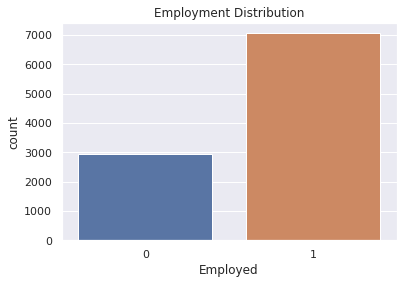

In [7]:
sns.countplot(data.Employed)
plt.title('Employment Distribution');

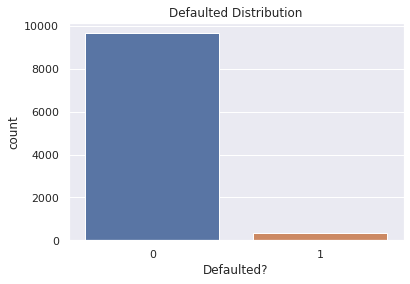

In [8]:
sns.countplot(data['Defaulted?'])
plt.title('Defaulted Distribution');

From the visualization above, I think it is safe to assume that unemployed customers have a higher tendency on defaulting on a loan due to unstable source of income. 

In [12]:
data['Annual Salary']

0       532339.56
1       145273.56
2       381205.68
3       428453.88
4       461562.00
          ...    
9995    635908.56
9996    235928.64
9997    703633.92
9998    440029.32
9999    202355.40
Name: Annual Salary, Length: 10000, dtype: float64

In [22]:
data['Bank Balance']

0        8754.36
1        9806.16
2       12882.60
3        6351.00
4        9427.92
          ...   
9995     8538.72
9996     9095.52
9997    10144.92
9998    18828.12
9999     2411.04
Name: Bank Balance, Length: 10000, dtype: float64

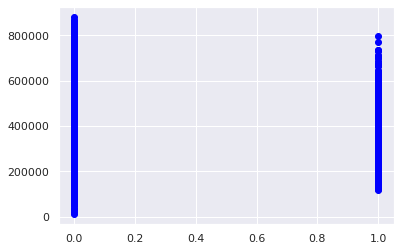

In [23]:
import matplotlib.pyplot as plt
plt.scatter(data['Defaulted?'], data['Annual Salary'], color='blue')

Checking the correlation between the features and target variable

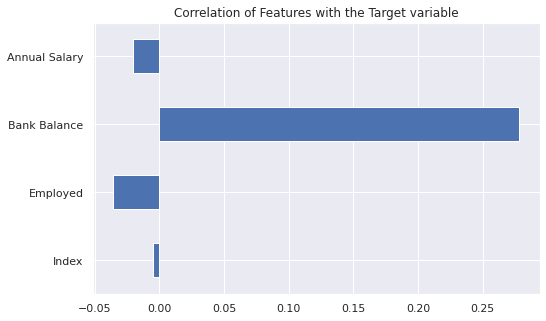

In [24]:

data.corr('spearman')['Defaulted?'][:-1].plot.barh(figsize=(8,5), 
                                          title='Correlation of Features with the Target variable');

## Data Preprocessing

In [25]:
X = data.iloc[:, 1:4]
X.head()
y = data.iloc[:, -1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Defaulted?, dtype: int64

In [26]:
X

,Employed,Bank Balance,Annual Salary
0,1,8754.36,532339.56
1,0,9806.16,145273.56
2,1,12882.60,381205.68
3,1,6351.00,428453.88
4,1,9427.92,461562.00
...,...,...,...
9995,1,8538.72,635908.56
9996,1,9095.52,235928.64
9997,1,10144.92,703633.92
9998,1,18828.12,440029.32


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

## Feature Scaling

We'll need to apply feature scaling in order to make the model to interprete the features on the same scale as this will aid the model to make accurate prediction. 

In [28]:
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

##Predictive Modelling

### USING RANDOM FOREST CLASSIFIER

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=0, n_jobs=-1)
model = classifier.fit(X_train, y_train)

### Key drivers to Model's Prediction
Let's grade the features by their uniqueness and importance to our model

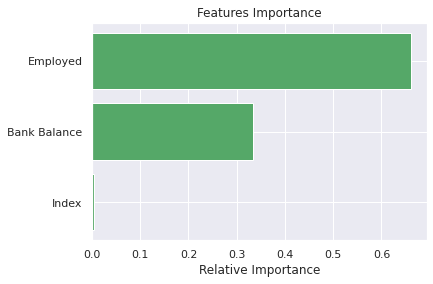

In [30]:
features = list(data.columns)[:3]
importances = classifier.feature_importances_[:3]
indices = np.argsort(importances)[:3]

plt.title('Features Importance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Prediction From Random Forest Classifier 

In [33]:
y_pred=classifier.predict(X_test)

y_pred=pd.DataFrame(data=y_pred)
y_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
2995,0
2996,0
2997,0
2998,0


### Model Performance Evaluation using Confusion Matrix

In [34]:
from sklearn import metrics
cm = metrics.confusion_matrix( y_test,y_pred , [1,0] )

tp, fp, fn, tn = cm[0][0], cm[0][1], cm[1][0], cm[1][1]

Text(0.5, 12.5, 'Predicted label')

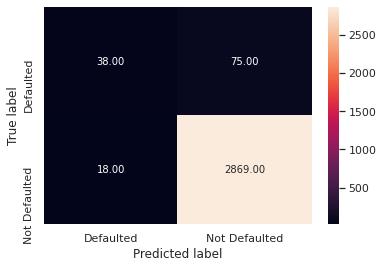

In [35]:

sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Defaulted", "Not Defaulted"] , yticklabels = ["Defaulted", "Not Defaulted"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Checking For Accuracy

In [36]:
acc = metrics.accuracy_score( y_test, y_pred )
prec = tp/(tp+fp)

print('Accuracy: ' + str(np.round(acc *100)) +' %')


Accuracy: 97.0 %


### GRADIENT BOOSTING

In [37]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[2876,   11],
       [  73,   40]])

## Validation Performance

In [39]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10)


Checked for the mean of the accuracy because it gives an unbiased evaluation of our model across multiple folds/subsets.

In [42]:
accuracies.mean().round()

1.0

In [41]:
accuracies.std()

0.0033926691677251394